In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Carregar o dataset
churn_df = pd.read_csv("telecom_churn_clean.csv")

# Separar features (X) e rótulos (y)
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar e treinar o modelo KNN com 5 vizinhos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliar a acurácia do modelo
accuracy = knn.score(X_test, y_test)
print(f"Acurácia do modelo: {accuracy:.2f}")



Acurácia do modelo: 0.85


In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Criando uma faixa de valores para o número de vizinhos
neighbors = np.arange(1, 21)  # Testando de 1 a 20 vizinhos
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Criar um classificador KNN com o número atual de vizinhos
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Treinar o modelo
    knn.fit(X_train, y_train)
  
    # Calcular a acurácia no conjunto de treino e teste
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229, np.int64(13): 0.858589647411853, np.int64(14): 0.8567141785446362, np.int64(15): 0.858589647411853, np.int64(16): 0.8574643660915229, np.int64(17): 0.8582145536384096, np.int64(18): 0.8567141785446362, np.int64(19): 0.8570892723180795, np.int64(20): 0.8563390847711928} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.8635

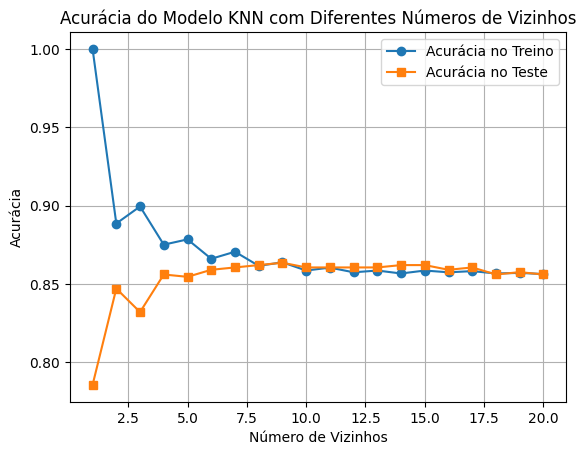

In [9]:
import matplotlib.pyplot as plt

# Adicionar um título
plt.title("Acurácia do Modelo KNN com Diferentes Números de Vizinhos")

# Plotar a acurácia no conjunto de treino
plt.plot(neighbors, train_accuracies.values(), label="Acurácia no Treino", marker='o')

# Plotar a acurácia no conjunto de teste
plt.plot(neighbors, test_accuracies.values(), label="Acurácia no Teste", marker='s')

# Configurações do gráfico
plt.legend()
plt.xlabel("Número de Vizinhos")
plt.ylabel("Acurácia")
plt.grid(True)

# Exibir o gráfico
plt.show()
